<a href="https://colab.research.google.com/github/SreedeviSagar/nyc_yellow_taxi_july_2023/blob/main/taxi_eda_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# NYC YELLOW TAXI:ANALYSIS AND PREDICTION ON TRIP DURATION

### **Life cycle of Machine learning Project**

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### **1. Problem statement**
- Yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP).
- This project understands how the trip duration for yellow taxi is affected by other variables such as 'VendorID', 'tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag','PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra','mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',total_amount', 'congestion_surcharge', 'Airport_fee'

### **2. Data Collection**
- Dataset Source - https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
- The data consists of 19 column and 3513649 rows.

**2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score,StratifiedKFold

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from xgboost import XGBRegressor

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


**Import the parquet Data as Pandas DataFrame**

In [ ]:
#read the dataset
data_path='/content/drive/MyDrive/yellow_tripdata_2023-05.parquet'


In [ ]:
!pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.9 MB/s eta 0:00:00


In [ ]:
df_taxi= pd.read_parquet(data_path,engine='fastparquet')

**Show Top 5 Records**

In [ ]:
df_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1.0,2023-05-01 00:33:13,2023-05-01 00:53:01,0.0,7.80,1.0,N,138.0,43.0,1.0,33.8,7.75,0.5,8.60,0.00,1.0,51.65,0.0,1.75
1,1.0,2023-05-01 00:42:49,2023-05-01 01:11:18,2.0,8.10,1.0,N,138.0,262.0,1.0,35.9,10.25,0.5,9.50,0.00,1.0,57.15,2.5,1.75
2,1.0,2023-05-01 00:56:34,2023-05-01 01:13:39,2.0,9.10,1.0,N,138.0,141.0,1.0,35.2,10.25,0.5,10.70,6.55,1.0,64.20,2.5,1.75
3,2.0,2023-05-01 00:00:52,2023-05-01 00:20:12,1.0,8.21,1.0,N,138.0,140.0,1.0,33.1,6.00,0.5,2.24,0.00,1.0,47.09,2.5,1.75
4,1.0,2023-05-01 00:05:50,2023-05-01 00:19:41,0.0,7.90,1.0,N,138.0,263.0,1.0,31.0,10.25,0.5,9.85,6.55,1.0,59.15,2.5,1.75


**Shape of the dataset**

In [ ]:
#identify shape of the dataframe
df_taxi.shape

(3513649, 19)

#### **2.2 Dataset information**


- **VendorID**------->A code indicating the TPEP provider that provided the record.
1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
- **tpep_pickup_datetime**----->The date and time when the meter was engaged.
- **tpep_dropoff_datetime**----> The date and time when the meter was disengaged.
- **passenger_count**----->The number of passengers in the vehicle.
This is a driver-entered value.
- **trip_distance**---->The elapsed trip distance in miles reported by the taximeter.
- **PULocationID**----->TLC Taxi Zone in which the taximeter was engaged
- **DOLocationID**----->TLC Taxi Zone in which the taximeter was disengaged
- **RateCodeID**------>The final rate code in effect at the end of the trip.
1= Standard rate
2=JFK
3=Newark
4=Nassau or Westchester
5=Negotiated fare
6=Group ride
- **store_and_fwd_flag**---->This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server.
Y= store and forward trip
N= not a store and forward trip
- **payment_type**----->A numeric code signifying how the passenger paid for the trip.
1= Credit card
2= Cash
3= No charge
4= Dispute
5= Unknown
6= Voided trip
- **fare_amount**------>The time-and-distance fare calculated by the meter.
- **extra**--------> Miscellaneous extras and surcharges. Currently, this only includes
the 0.50 dollar and 1 dollar rush hour and overnight charges.
- **mta_tax**------> 0.50 dollar MTA tax that is automatically triggered based on the metered rate in use.
- **improvement_surcharge**----->0.30 dollar improvement surcharge assessed trips at the flag drop. The
improvement surcharge began being levied in 2015.
- **tip_amount**------> This field is automatically populated for credit card
tips. Cash tips are not included.
- **tolls_amount**------>Total amount of all tolls paid in trip.
- **total_amount**------->The total amount charged to passengers. Does not include cash tips.
- **congestion_surcharge**------>Total amount collected in trip for NYS congestion surcharge.
- **Airport_fee**------>$1.25 for pick up only at LaGuardia and John F. Kennedy Airports

### **3. Data Checks to perform**

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check various categories present in the different categorical column
- Check statistics of data set

#### **3.1 Check Missing values**

In [ ]:
df_taxi.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          101796
trip_distance                 0
RatecodeID               101796
store_and_fwd_flag       101796
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     101796
Airport_fee              101796
dtype: int64

There are no missing values in the data set

**3.2 Check Duplicates**

In [ ]:
df_taxi.duplicated().sum()

0

There are no duplicates values in the data set

**3.3 Check data types**

In [ ]:
#concise summary of dataframe
df_taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513649 entries, 0 to 3513648
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           float64       
 8   DOLocationID           float64       
 9   payment_type           float64       
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

**3.4 Checking the number of unique values of each column**

In [ ]:
df_taxi.nunique()

VendorID                       3
tpep_pickup_datetime     1719068
tpep_dropoff_datetime    1718084
passenger_count               10
trip_distance               4651
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 261
DOLocationID                 260
payment_type                   5
fare_amount                 9555
extra                         55
mta_tax                        9
tip_amount                  4374
tolls_amount                 919
improvement_surcharge          5
total_amount               18064
congestion_surcharge           4
Airport_fee                    4
dtype: int64

**3.5 Check various categories present in the different categorical column**

In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df_taxi.columns if df_taxi[feature].dtype != 'O']
categorical_features = [feature for feature in df_taxi.columns if df_taxi[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 18 numerical features : ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']

We have 1 categorical features : ['store_and_fwd_flag']


In [ ]:
print("Categories in 'store_and_fwd_flag': " ,end="")
print(df_taxi['store_and_fwd_flag'].unique())

Categories in 'store_and_fwd_flag': ['N' 'Y' None]


**3.5 Check statistics of data set**

In [ ]:
df_taxi.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,3513649.0,1.735567,0.443707,1.00,1.00,2.00,2.00,6.00
passenger_count,3411853.0,1.358800,0.879611,0.00,1.00,1.00,1.00,9.00
trip_distance,3513649.0,4.345816,293.398407,0.00,1.09,1.83,3.51,342344.85
RatecodeID,3411853.0,1.587358,7.071919,1.00,1.00,1.00,1.00,99.00
PULocationID,3513649.0,165.589568,63.994129,1.00,132.00,162.00,234.00,265.00
DOLocationID,3513649.0,164.508411,69.895886,1.00,114.00,162.00,234.00,265.00
payment_type,3513649.0,1.187269,0.542795,0.00,1.00,1.00,1.00,4.00
fare_amount,3513649.0,19.876871,19.208608,-870.00,9.30,13.50,22.60,6300.90
extra,3513649.0,1.616245,1.872595,-7.50,0.00,1.00,2.50,16.25
mta_tax,3513649.0,0.486452,0.104928,-0.50,0.50,0.50,0.50,4.00


#### **Insights:**
- **From above description of numerical data, all means are not close to each other.So scaling should be done**
- **The pick up/drop off datetime includes 2002 but we are expecting the records only for 2023.So the years in the records should be checked**.
- **Maximum value in 'RatecodeID' shows the value as 99 which is an out of range value**.
- **Negative values are noted in the  amount related features which is to be checked.**
- **The mean and median values of amount related features are highly varied from maximum values expecting outliers.**
- **The trip distance also deviates a lot from mean and median values expecting outliers.**
- **Minimum passenger count is zero and maximum count is 9.**

In [ ]:
df_taxi.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime','store_and_fwd_flag'],axis=1).skew()


VendorID                  -0.946221
passenger_count            2.837618
trip_distance            726.966284
RatecodeID                13.661490
PULocationID              -0.257900
DOLocationID              -0.371486
payment_type               2.131996
fare_amount               13.022351
extra                      1.338011
mta_tax                   -8.201827
tip_amount                 5.790848
tolls_amount               4.907173
improvement_surcharge    -10.177568
total_amount               7.767965
congestion_surcharge      -3.499107
Airport_fee                2.935078
dtype: float64

#### **Insight:**
- **Distribution of features are highly/moderately skewed. So transformation is needed.**

### **4.Feature Engineering**

- Add new columns
- Missing value Imputation

#### **4.1 Creating new columns from pick up datetime**

In [ ]:
#Now construct other variables, like month, date, etc.
df_taxi["tpep_pickup_year"] =df_taxi ["tpep_pickup_datetime"].dt.year
df_taxi["tpep_pickup_month"] =df_taxi ["tpep_pickup_datetime"].dt.month
df_taxi["tpep_pickup_day"] = df_taxi["tpep_pickup_datetime"].dt.day
df_taxi["tpep_pickup_weekday"] = df_taxi["tpep_pickup_datetime"].dt.weekday
df_taxi["tpep_pickup_hour"] = df_taxi["tpep_pickup_datetime"].dt.hour
df_taxi["tpep_pickup_minute"] = df_taxi["tpep_pickup_datetime"].dt.minute

In [ ]:
df_taxi["trip_duration"]=df_taxi["tpep_dropoff_datetime"]-df_taxi["tpep_pickup_datetime"]

In [ ]:
#converting the time difference to minutes
df_taxi['trip_duration']=df_taxi['trip_duration'].apply(lambda x:(x.seconds)/60)


In [ ]:
#df_taxi['trip_duration']

In [ ]:
df_taxi.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'tpep_pickup_year', 'tpep_pickup_month', 'tpep_pickup_day',
       'tpep_pickup_weekday', 'tpep_pickup_hour', 'tpep_pickup_minute',
       'trip_duration'],
      dtype='object')

#### **4.2 Missing value Imputation**

##### **4.2.1 Treating the years other than 2023**

In [ ]:
for col in ['tpep_pickup_month', 'tpep_pickup_day', 'tpep_pickup_weekday','tpep_pickup_hour', 'tpep_pickup_minute','tpep_pickup_year']:
    print("The count of unique values in",col,":",df_taxi[col].unique())

The count of unique values in tpep_pickup_month : [ 5  4 12  1  6  7  8  9]
The count of unique values in tpep_pickup_day : [ 1 30 31  8  2  9  3  4 10 11  5  6  7 15 12 13 14 16 17 18 19 20 21 22
 25 23 24 27 26 28 29]
The count of unique values in tpep_pickup_weekday : [0 6 2 1 3 4 5]
The count of unique values in tpep_pickup_hour : [ 0 23  1  2  3  4  5  6  8  9  7 10 11 13 12 19 14 21 22 15 16 17 18 20]
The count of unique values in tpep_pickup_minute : [33 42 56  0  5 50 13 48 28 18 52 55  4  7 30 47 53 34 14 15 44 45 19 46
 24  2 10 11 16 59 51 17  6 22 38 37 23  3 36 12 57 21 35 27  8 29 32 25
 31 43 41 58 26 54 40 20 49 39  9  1]
The count of unique values in tpep_pickup_year : [2023 2008 2002 2003 2009]


In [ ]:
df_taxi['tpep_pickup_year'].value_counts()

2023    3513644
2008          2
2002          1
2003          1
2009          1
Name: tpep_pickup_year, dtype: int64

In [ ]:
df_taxi[(df_taxi['tpep_pickup_year']!=2023)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,Airport_fee,tpep_pickup_year,tpep_pickup_month,tpep_pickup_day,tpep_pickup_weekday,tpep_pickup_hour,tpep_pickup_minute,trip_duration
9891,2.0,2008-12-31 23:07:01,2009-01-01 08:44:25,1.0,18.69,2.0,N,132.0,166.0,1.0,...,95.76,0.0,1.75,2008,12,31,2,23,7,577.400000
215803,2.0,2002-12-31 23:28:55,2002-12-31 23:33:07,1.0,0.98,1.0,N,237.0,162.0,2.0,...,10.50,2.5,0.00,2002,12,31,1,23,28,4.200000
743452,2.0,2003-01-01 00:07:27,2003-01-01 16:54:06,1.0,20.12,1.0,N,132.0,228.0,1.0,...,110.62,0.0,0.00,2003,1,1,2,0,7,1006.650000
2540215,2.0,2009-01-01 23:54:03,2009-01-02 00:03:28,1.0,0.00,1.0,N,193.0,264.0,2.0,...,4.50,0.0,0.00,2009,1,1,3,23,54,9.416667
3239379,2.0,2008-12-31 13:14:17,2008-12-31 14:27:28,1.0,19.37,2.0,N,132.0,143.0,1.0,...,96.66,2.5,0.00,2008,12,31,2,13,14,73.183333


##### **Insights:**
- **Records may be wrongly entered instead of the year 2023. So better droping those 5 rows**

In [ ]:
df_taxi[(df_taxi['tpep_pickup_year']!=2023)].index


Int64Index([9891, 215803, 743452, 2540215, 3239379], dtype='int64')

In [ ]:
df_taxi.drop(df_taxi[(df_taxi['tpep_pickup_year']!=2023)].index,inplace=True)


In [ ]:
df_taxi.shape


(3513644, 26)

##### **4.2.2 Treating missing values**

In [ ]:
null_col=df_taxi.isna().sum()[df_taxi.isna().sum()>0].index

In [ ]:
null_col

Index(['passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [ ]:
df_taxi[df_taxi.isna().any(axis=1)]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,Airport_fee,tpep_pickup_year,tpep_pickup_month,tpep_pickup_day,tpep_pickup_weekday,tpep_pickup_hour,tpep_pickup_minute,trip_duration
3411853,2.0,2023-05-01 00:28:00,2023-05-01 00:48:00,NaN,5.57,NaN,None,100.0,25.0,0.0,...,35.35,NaN,NaN,2023,5,1,0,0,28,20.000000
3411854,1.0,2023-05-01 00:54:36,2023-05-01 01:06:53,NaN,3.70,NaN,None,148.0,13.0,0.0,...,23.83,NaN,NaN,2023,5,1,0,0,54,12.283333
3411855,1.0,2023-05-01 00:30:23,2023-05-01 00:44:29,NaN,0.00,NaN,None,231.0,48.0,0.0,...,19.35,NaN,NaN,2023,5,1,0,0,30,14.100000
3411856,2.0,2023-05-01 00:55:00,2023-05-01 01:06:00,NaN,2.17,NaN,None,151.0,263.0,0.0,...,19.26,NaN,NaN,2023,5,1,0,0,55,11.000000
3411857,2.0,2023-05-01 00:03:00,2023-05-01 00:13:00,NaN,2.26,NaN,None,234.0,230.0,0.0,...,15.45,NaN,NaN,2023,5,1,0,0,3,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513644,2.0,2023-05-31 23:59:36,2023-06-01 00:13:11,NaN,2.18,NaN,None,186.0,229.0,0.0,...,21.07,NaN,NaN,2023,5,31,2,23,59,13.583333
3513645,2.0,2023-05-31 23:52:44,2023-05-31 23:56:07,NaN,0.67,NaN,None,224.0,137.0,0.0,...,18.17,NaN,NaN,2023,5,31,2,23,52,3.383333
3513646,2.0,2023-05-31 23:26:09,2023-05-31 23:26:23,NaN,0.00,NaN,None,161.0,161.0,0.0,...,17.56,NaN,NaN,2023,5,31,2,23,26,0.233333
3513647,2.0,2023-05-31 23:03:44,2023-05-31 23:42:29,NaN,13.95,NaN,None,162.0,259.0,0.0,...,56.52,NaN,NaN,2023,5,31,2,23,3,38.750000


##### **Insight:**
- **All null values for the corresponding columns are in the same row.**

In [ ]:
df_null=df_taxi.loc[df_taxi['passenger_count'].isna(),:]


In [ ]:
df_null

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,Airport_fee,tpep_pickup_year,tpep_pickup_month,tpep_pickup_day,tpep_pickup_weekday,tpep_pickup_hour,tpep_pickup_minute,trip_duration
3411853,2.0,2023-05-01 00:28:00,2023-05-01 00:48:00,NaN,5.57,NaN,None,100.0,25.0,0.0,...,35.35,NaN,NaN,2023,5,1,0,0,28,20.000000
3411854,1.0,2023-05-01 00:54:36,2023-05-01 01:06:53,NaN,3.70,NaN,None,148.0,13.0,0.0,...,23.83,NaN,NaN,2023,5,1,0,0,54,12.283333
3411855,1.0,2023-05-01 00:30:23,2023-05-01 00:44:29,NaN,0.00,NaN,None,231.0,48.0,0.0,...,19.35,NaN,NaN,2023,5,1,0,0,30,14.100000
3411856,2.0,2023-05-01 00:55:00,2023-05-01 01:06:00,NaN,2.17,NaN,None,151.0,263.0,0.0,...,19.26,NaN,NaN,2023,5,1,0,0,55,11.000000
3411857,2.0,2023-05-01 00:03:00,2023-05-01 00:13:00,NaN,2.26,NaN,None,234.0,230.0,0.0,...,15.45,NaN,NaN,2023,5,1,0,0,3,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513644,2.0,2023-05-31 23:59:36,2023-06-01 00:13:11,NaN,2.18,NaN,None,186.0,229.0,0.0,...,21.07,NaN,NaN,2023,5,31,2,23,59,13.583333
3513645,2.0,2023-05-31 23:52:44,2023-05-31 23:56:07,NaN,0.67,NaN,None,224.0,137.0,0.0,...,18.17,NaN,NaN,2023,5,31,2,23,52,3.383333
3513646,2.0,2023-05-31 23:26:09,2023-05-31 23:26:23,NaN,0.00,NaN,None,161.0,161.0,0.0,...,17.56,NaN,NaN,2023,5,31,2,23,26,0.233333
3513647,2.0,2023-05-31 23:03:44,2023-05-31 23:42:29,NaN,13.95,NaN,None,162.0,259.0,0.0,...,56.52,NaN,NaN,2023,5,31,2,23,3,38.750000


#####  
- **Checking for any abnormalities in the respective records of the missing value datas**

In [ ]:
for col in df_null.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1):
    print("The count of unique values in",col,":",df_null[col].nunique())
    print(df_null[col].unique())
    #sns.histplot(data=df_null,x=col,kde=True,color='g')
    print("-"*40,"*"*10,"-"*40)
    print("")

The count of unique values in VendorID : 3
[2. 1. 6.]
---------------------------------------- ********** ----------------------------------------

The count of unique values in passenger_count : 0
[nan]
---------------------------------------- ********** ----------------------------------------

The count of unique values in trip_distance : 2516
[5.57000e+00 3.70000e+00 0.00000e+00 ... 2.10900e+01 1.34498e+04
 3.94200e+01]
---------------------------------------- ********** ----------------------------------------

The count of unique values in RatecodeID : 0
[nan]
---------------------------------------- ********** ----------------------------------------

The count of unique values in store_and_fwd_flag : 0
[None]
---------------------------------------- ********** ----------------------------------------

The count of unique values in PULocationID : 233
[100. 148. 231. 151. 234. 246. 163. 262.  79.  75. 142. 143. 138. 170.
 263.  68. 249. 261. 141. 211.  42. 137.  90.  62. 224. 113

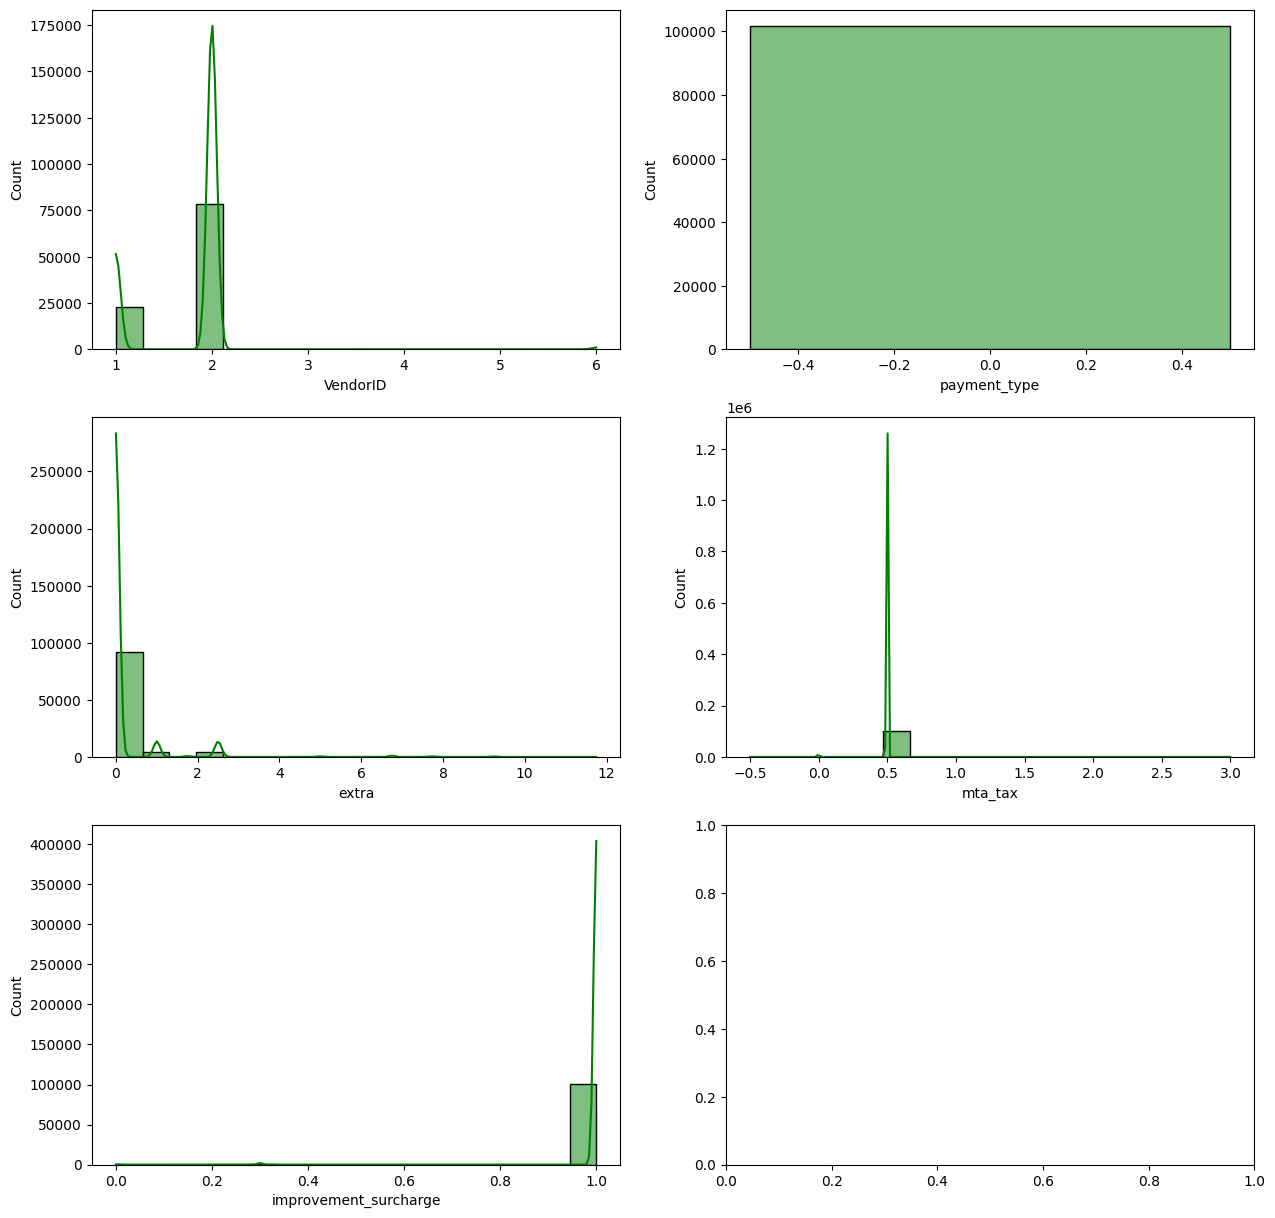

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
for column,subplot in zip(df_null[['VendorID','payment_type', 'extra','mta_tax','improvement_surcharge']],ax.flatten()):
    sns.histplot(data=df_null,x=column,kde=True,color='g',ax=subplot)


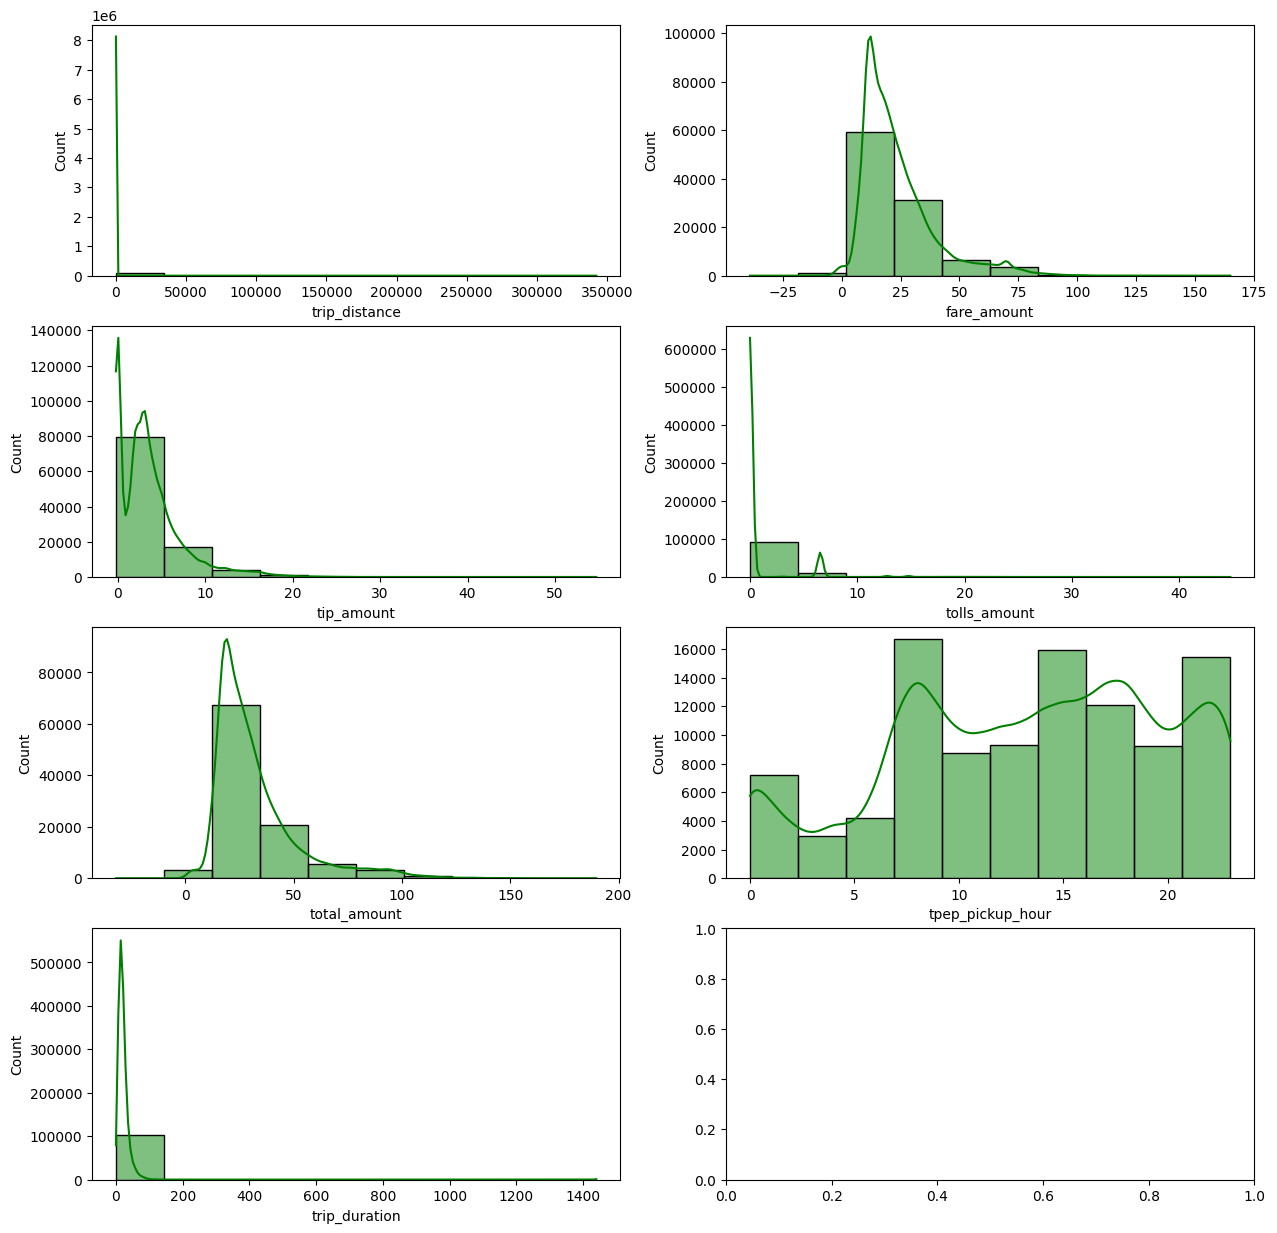

In [ ]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
for column,subplot in zip(df_null[['trip_distance','fare_amount','tip_amount', 'tolls_amount','total_amount','tpep_pickup_hour','trip_duration']],ax.flatten()):
    sns.histplot(data=df_null,x=column,bins=10,kde=True,color='g',ax=subplot)


##### **Insight:**
- **No abnormalities are noted in other columns for corresponding missing data records.**
- **Moreover payment_type is also recorded as 0 which is not defined.**
- **As the trip record was not held in vehicle memory for these records, imputation by any means may alter the relevance of data.So, better drop those rows with missing values.**


In [ ]:
#Drop the rows with missing values
df_taxi.dropna(inplace=True)

In [ ]:
#df_taxi.isna().sum()

#### **4.2.3 Treating the negative values in total_amount**

In [ ]:
df_negative=df_taxi[df_taxi['total_amount']<0]


In [ ]:
df_negative[['trip_distance','fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee','trip_duration','store_and_fwd_flag']]


,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,trip_duration,store_and_fwd_flag
32,1.06,-8.6,-1.0,-0.5,2.72,0.00,-1.0,-10.88,-2.5,0.00,6.533333,N
280,10.86,-42.2,-6.0,-0.5,0.00,0.00,-1.0,-51.45,0.0,-1.75,18.116667,N
622,12.86,-49.2,-6.0,-0.5,0.00,0.00,-1.0,-58.45,0.0,-1.75,20.216667,N
820,17.66,-70.0,0.0,-0.5,0.00,-6.55,-1.0,-82.30,-2.5,-1.75,29.000000,N
871,13.41,-50.6,-1.0,-0.5,10.62,0.00,-1.0,-42.48,0.0,0.00,20.916667,N
...,...,...,...,...,...,...,...,...,...,...,...,...
3411315,9.33,-36.6,-1.0,-0.5,0.00,0.00,-1.0,-40.85,0.0,-1.75,14.716667,N
3411472,0.03,-3.0,-1.0,-0.5,0.00,0.00,-1.0,-8.00,-2.5,0.00,0.933333,N
3411524,9.16,-44.3,-1.0,-0.5,0.00,0.00,-1.0,-49.30,-2.5,0.00,34.016667,N
3411675,3.20,-15.6,-1.0,-0.5,0.00,0.00,-1.0,-20.60,-2.5,0.00,11.433333,N


In [ ]:
pd.crosstab(df_negative['store_and_fwd_flag'],df_negative['RatecodeID'])

RatecodeID,1.0,2.0,3.0,4.0,5.0
store_and_fwd_flag,,,,,
N,28445,2289,377,141,515
Y,6,0,0,0,0


##### **Insight:**
- **Around 99% negative values in fare related variables from unrecorded trip details('store_and_fwd_flag').So better drop those rows.**

In [ ]:
df_taxi.drop(df_taxi[(df_taxi['total_amount']<0)].index,inplace=True)


In [ ]:
#df_taxi[(df_taxi['total_amount']<0)]


In [ ]:
df_taxi['store_and_fwd_flag'].value_counts()

N    3358293
Y      21782
Name: store_and_fwd_flag, dtype: int64

#### **4.2.4 Treating the out of range values in RatecodeID**

In [ ]:
df_rate_99=df_taxi[df_taxi['RatecodeID']==99]

In [ ]:
df_rate_99['Airport_fee'].value_counts()

0.00    17832
1.75        2
Name: Airport_fee, dtype: int64

In [ ]:
df_air=df_taxi[df_taxi['Airport_fee']==0]

In [ ]:
df_air['RatecodeID'].value_counts()

1.0     3000910
2.0       54419
99.0      17832
5.0       14781
3.0       11403
4.0        1997
6.0           4
Name: RatecodeID, dtype: int64

##### **Insight:**
- **Any values to impute the out of range value will mislead the data accuracy.So better drop those rows.**

In [ ]:
df_taxi.drop(df_taxi[(df_taxi['RatecodeID']==99)].index,inplace=True)


In [ ]:
#df_taxi[df_taxi['payment_type']==4]


#### **4.2.4 Treating the maximum suspected records in trip distance**

In [ ]:
# calculate IQR for column trip_distance
Q1 = df_taxi['trip_distance'].quantile(0.25)
Q3 = df_taxi['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
Q3

3.42

In [ ]:
# identify outliers
threshold = 1.5
outliers = df_taxi[(df_taxi['trip_distance'] < Q1 - threshold * IQR) | (df_taxi['trip_distance'] > Q3 + threshold * IQR)]

In [ ]:
outliers['trip_distance'].sort_values(ascending=False)[:60]

2653747    13053.47
3242275     9684.61
930367      9681.91
853409      9681.66
2459261     9679.84
1051318     9679.66
1662776     9679.47
832531      9678.97
3349056     9678.91
1298942     9678.78
1874373     9678.70
1870350     9678.32
2680751     9677.98
1874183     9677.90
834498      9677.69
2832796     9676.68
1082338     9675.91
502462      9675.40
1206854     9675.03
1904960     9674.96
1638882     9674.63
961720      9674.59
3380957     9674.53
1079211     9674.23
1037444     9674.20
2560579     9674.10
2132152     9673.95
2164065     9673.87
532434      9673.77
2832814     9673.25
1753077     7824.89
2868096     6534.96
1603919     4419.07
3057694     3530.28
1550346     1004.56
2464495      837.50
1596963      371.46
743743       281.70
3324137      274.90
2611642      243.26
2556647      198.12
31813        178.46
211290       167.60
2766092      167.41
1422843      153.19
2999811      146.00
827214       143.66
1127965      139.72
2806969      139.05
330939       133.99


In [ ]:
#sns.boxplot(df_taxi['trip_distance']);


#### **Insight:**
- **From the boxplot and outlier detection formula applied on dataset,extremities are there even in the outliers.**
- **So better to check the relation between trip distance and trip duration which may invoke some insights.**

In [ ]:
trip_dis_100=df_taxi[df_taxi['trip_distance']>100][['trip_duration','trip_distance', 'tpep_pickup_hour','total_amount','RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee']]
trip_dis_100

,trip_duration,trip_distance,tpep_pickup_hour,total_amount,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
31813,237.900000,178.46,12,507.55,5.0,N,132.0,265.0,2.0,500.0,0.00,0.0,0.00,6.55,1.0,0.0,0.00
75261,132.950000,114.49,19,391.30,5.0,N,216.0,265.0,2.0,371.0,0.00,0.0,0.00,19.30,1.0,0.0,0.00
195403,95.550000,111.30,21,420.80,5.0,N,252.0,265.0,1.0,350.0,0.00,0.0,0.00,69.80,1.0,0.0,0.00
211290,196.633333,167.60,0,472.05,5.0,N,132.0,265.0,2.0,450.0,1.75,0.0,0.00,19.30,1.0,0.0,1.75
330939,149.100000,133.99,5,459.30,5.0,N,132.0,265.0,2.0,450.0,0.00,0.0,0.00,6.55,1.0,0.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274911,117.783333,108.90,18,615.30,5.0,N,132.0,265.0,1.0,510.0,1.75,0.0,102.55,0.00,1.0,0.0,1.75
3324137,430.833333,274.90,10,1327.52,3.0,N,28.0,211.0,1.0,1055.5,0.00,0.0,222.22,48.80,1.0,0.0,0.00
3349056,71.266667,9678.91,14,78.96,1.0,N,239.0,36.0,1.0,61.8,0.00,0.5,13.16,0.00,1.0,2.5,0.00
3362657,156.783333,130.11,16,845.80,4.0,N,132.0,265.0,2.0,815.0,2.50,0.0,0.00,25.55,1.0,0.0,1.75


<Axes: xlabel='trip_distance', ylabel='trip_duration'>

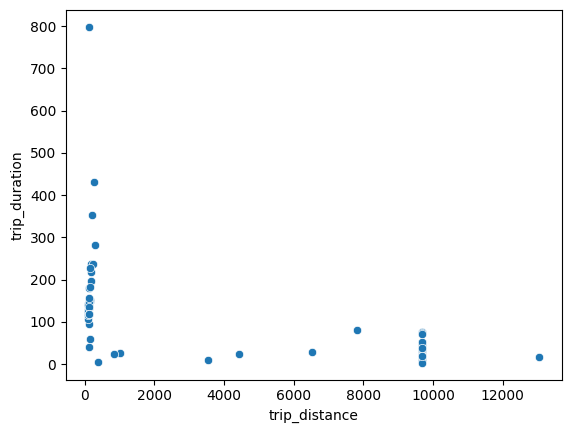

In [ ]:
sns.scatterplot(data=trip_dis_100,x="trip_distance", y="trip_duration")

#### **Insight:**
- **Trip distance more than (around) 1500 shows non linearity indicates that data may be invalid.**
- **So better concentrating values of trip distance within 1500.**

In [ ]:
trip_dis_1500=df_taxi[(df_taxi['trip_distance']>100)&(df_taxi['trip_distance']<1500)][['trip_duration','trip_distance', 'tpep_pickup_hour','tpep_pickup_weekday','total_amount','extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'congestion_surcharge', 'Airport_fee','RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount']]
trip_dis_1500

,trip_duration,trip_distance,tpep_pickup_hour,tpep_pickup_weekday,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount
31813,237.900000,178.46,12,0,507.55,0.00,0.0,0.00,6.55,1.0,0.0,0.00,5.0,132.0,265.0,2.0,500.0
75261,132.950000,114.49,19,0,391.30,0.00,0.0,0.00,19.30,1.0,0.0,0.00,5.0,216.0,265.0,2.0,371.0
195403,95.550000,111.30,21,1,420.80,0.00,0.0,0.00,69.80,1.0,0.0,0.00,5.0,252.0,265.0,1.0,350.0
211290,196.633333,167.60,0,2,472.05,1.75,0.0,0.00,19.30,1.0,0.0,1.75,5.0,132.0,265.0,2.0,450.0
330939,149.100000,133.99,5,3,459.30,0.00,0.0,0.00,6.55,1.0,0.0,1.75,5.0,132.0,265.0,2.0,450.0
723597,181.166667,111.98,12,6,411.00,0.00,0.0,10.00,0.00,1.0,0.0,0.00,5.0,132.0,265.0,1.0,400.0
743743,281.250000,281.70,15,6,1011.70,0.00,0.5,0.00,6.55,1.0,0.0,1.75,1.0,132.0,265.0,2.0,1001.9
827214,149.650000,143.66,14,0,537.45,0.00,0.0,0.00,19.30,1.0,0.0,1.75,1.0,132.0,265.0,2.0,515.4
1127965,151.350000,139.72,8,3,520.30,0.00,0.0,0.00,19.30,1.0,0.0,0.00,1.0,132.0,265.0,2.0,500.0
1139140,138.050000,110.56,10,3,700.40,0.00,0.0,0.00,6.55,1.0,0.0,1.75,4.0,132.0,265.0,2.0,691.1


In [ ]:
#sns.scatterplot(data=trip_dis_1500,x="trip_distance", y="trip_duration",hue='tpep_pickup_hour')


#### **Insight:**
- **Evaluating and visualising the trip distance vs trip duration, values of trip distance greater than 300 shows non linearity with other features also.**
- **So better drop those rows with values greater than 300.**

In [ ]:
trip_dis_300=df_taxi[df_taxi['trip_distance']>300]
trip_dis_300.index

Int64Index([ 502462,  532434,  832531,  834498,  853409,  930367,  961720,
            1037444, 1051318, 1079211, 1082338, 1206854, 1298942, 1550346,
            1596963, 1603919, 1638882, 1662776, 1753077, 1870350, 1874183,
            1874373, 1904960, 2132152, 2164065, 2459261, 2464495, 2560579,
            2653747, 2680751, 2832796, 2832814, 2868096, 3057694, 3242275,
            3349056, 3380957],
           dtype='int64')

In [ ]:
df_taxi.drop(df_taxi[(df_taxi['trip_distance']>300)].index,inplace=True)

In [ ]:
#df_taxi[(df_taxi['PULocationID']==236)&(df_taxi['DOLocationID']==100)]

### **5. Exploring Data ( Visualization )**


#### **5.1 Visualize 'total_amount' distribution to make some conclusion.**


- **Histogram**
- **Kernel Distribution Function (KDE)**
- **Box plot**

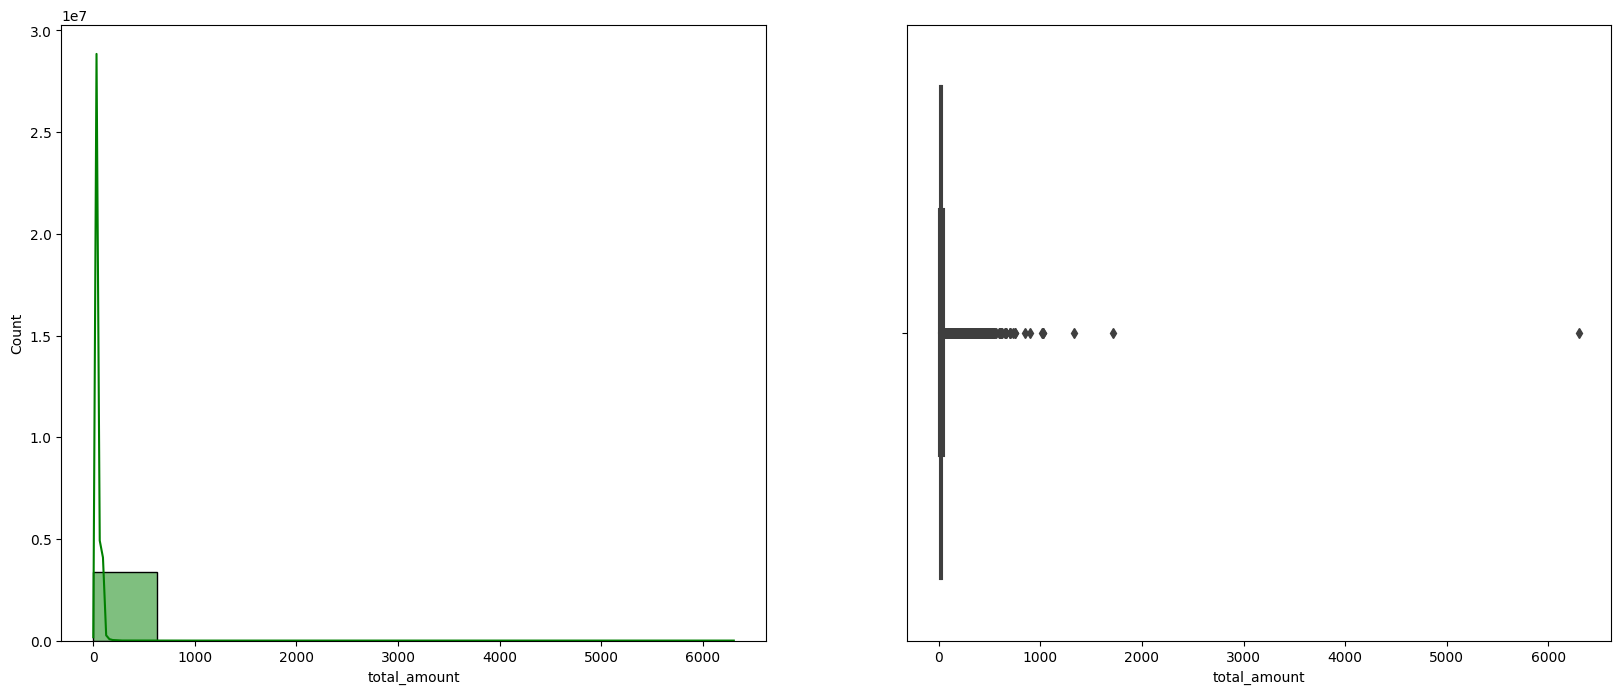

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=df_taxi,x='total_amount',bins=10,kde=True,color='g')
#set(xlim=(0,15),ylim=(0,100)))
plt.subplot(122)
sns.boxplot(data=df_taxi,x='total_amount')
plt.show()

#### **Insights:**
- **Most of the 'Total amount' lies within range of 50$**
- **Some outliers can also be seen from the box plot**
- **Negative values in the amount also to be checked**


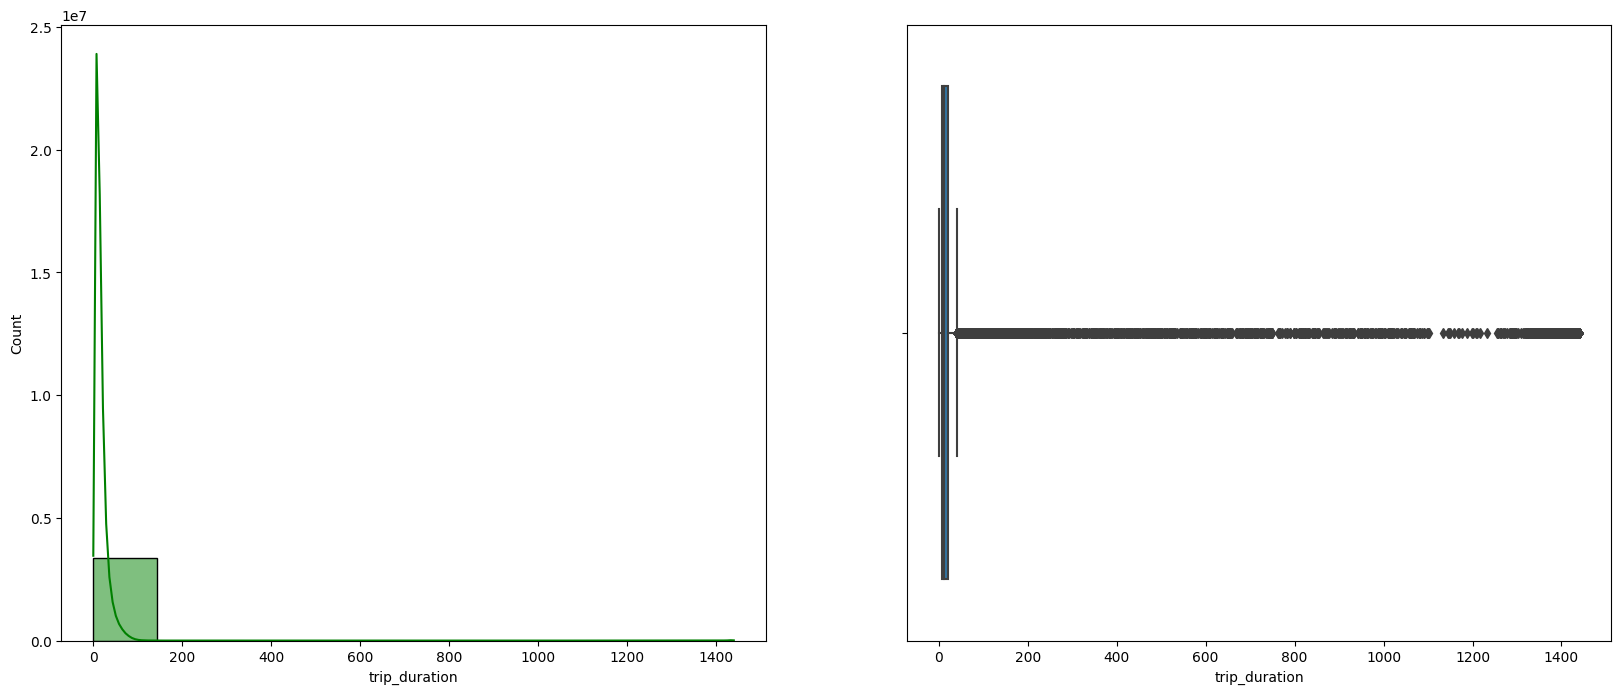

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=df_taxi,x='trip_duration',bins=10,kde=True,color='g')
plt.subplot(122)
sns.boxplot(data=df_taxi,x='trip_duration')
plt.show()

### **5.2 Univariate/Bivariate/Multivariate Analysis**

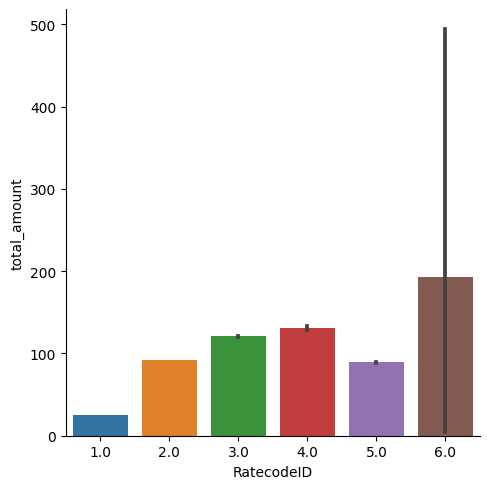

In [ ]:
sns.catplot(x='RatecodeID',y='total_amount',data=df_taxi,kind='bar');


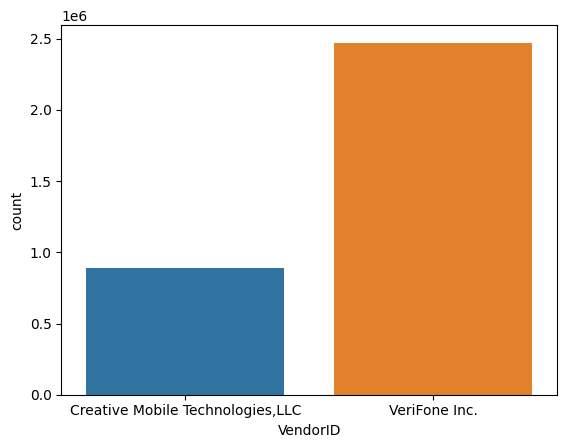

In [ ]:
xs=[0,1]
labels=['Creative Mobile Technologies,LLC','VeriFone Inc.']

sns.countplot(data=df_taxi,x='VendorID');
plt.xticks(xs,labels);

#### **Insight:**
- **Major count of the records from vendor with id =2(VeriFone Inc.) followed by  id 1 (Creative Mobile Technologies, LLC)**

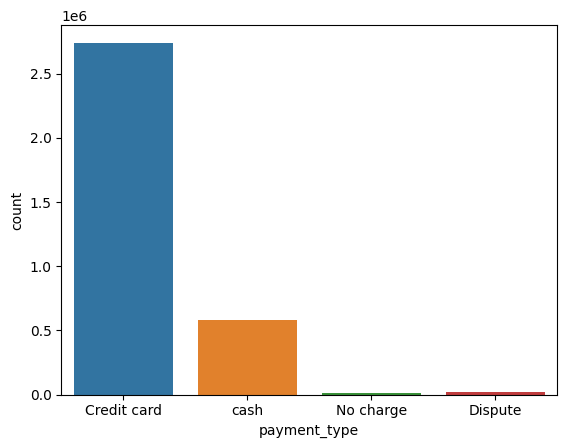

In [ ]:

xs=[0,1,2,3]
labels=['Credit card','cash','No charge','Dispute']

sns.countplot(data=df_taxi,x='payment_type');
plt.xticks(xs,labels);



#### **Insight:**
- **Most of the payment was made through credit card followed by cash,dispute and no charge.**

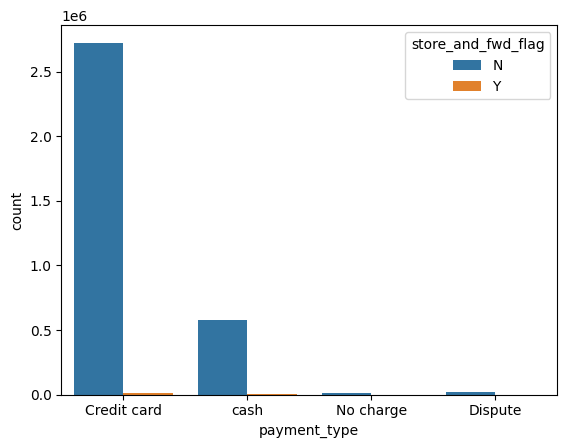

In [ ]:

xs=[0,1,2,3]
labels=['Credit card','cash','No charge','Dispute']

sns.countplot(data=df_taxi,x='payment_type',hue='store_and_fwd_flag');
plt.xticks(xs,labels);



#### **Insight:**
- **Payment type indicated as 'dispute' and 'no charge' comes from not stored and forward trip.**

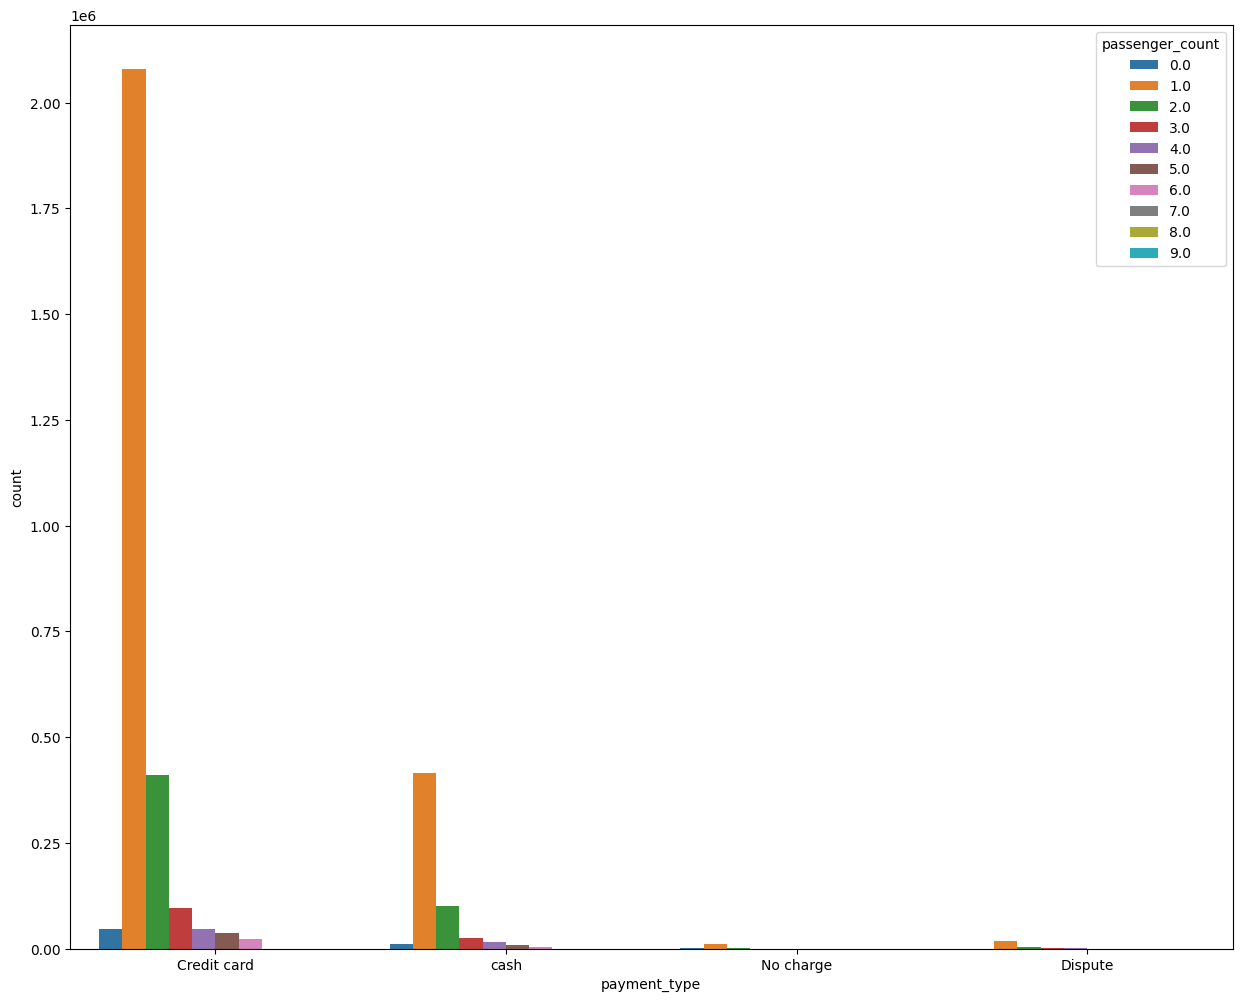

In [ ]:
plt.figure(figsize=(15,12))

sns.countplot(data=df_taxi,x='payment_type',hue='passenger_count');
plt.xticks([0,1,2,3],['Credit card','cash','No charge','Dispute']);



#### **Insight:**
- **Most of the trips include single passenger followed by double.**

In [ ]:
df_taxi.groupby('PULocationID').size().sort_values(ascending=False)


PULocationID
132.0    174630
237.0    169610
161.0    157812
236.0    147738
138.0    130326
          ...  
30.0          1
176.0         1
109.0         1
46.0          1
172.0         1
Length: 259, dtype: int64

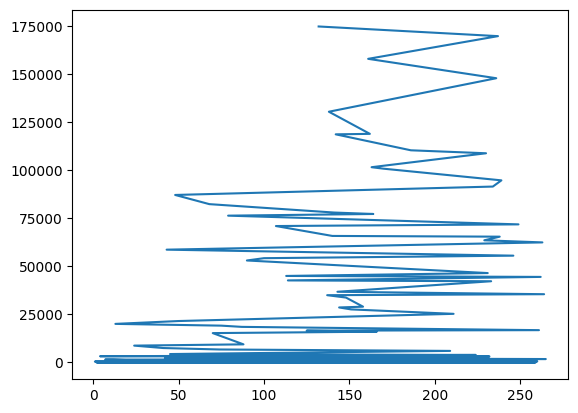

In [ ]:
plt.plot(df_taxi.groupby('PULocationID').size().sort_values(ascending=False));


#### **Insight:**
- **Most of the pick up location id is at 132 followed by 237 and 161.**

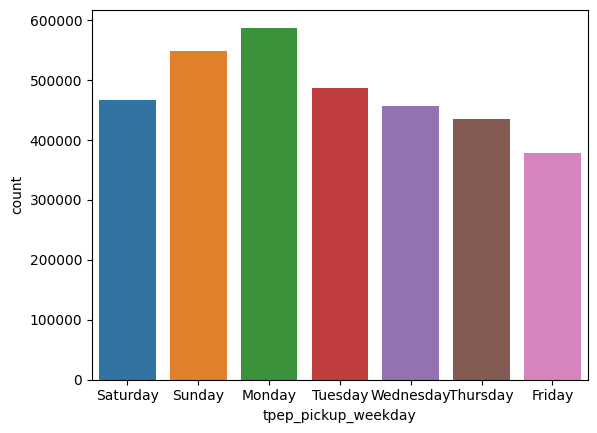

In [ ]:
xs=[0,1,2,3,4,5,6]
labels=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday']

sns.countplot(data=df_taxi,x='tpep_pickup_weekday');
plt.xticks(xs,labels);

#### **Insight:**
- **Trip count is high on Monday followed by Sunday.**

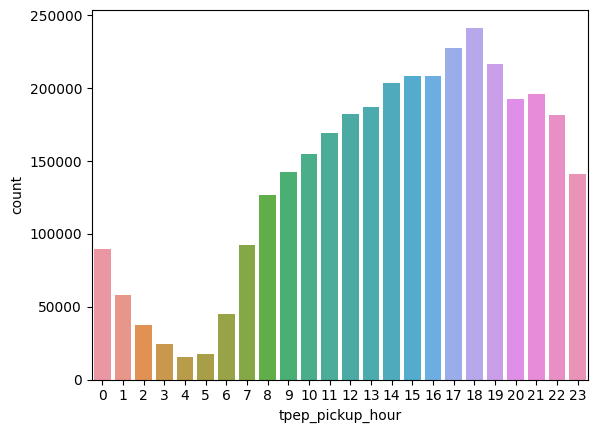

In [ ]:
sns.countplot(data=df_taxi,x='tpep_pickup_hour');


#### **Insight:**
- **Peak time is between 5pm and 6pm.**
- **Least time is between 4am and 5am.**

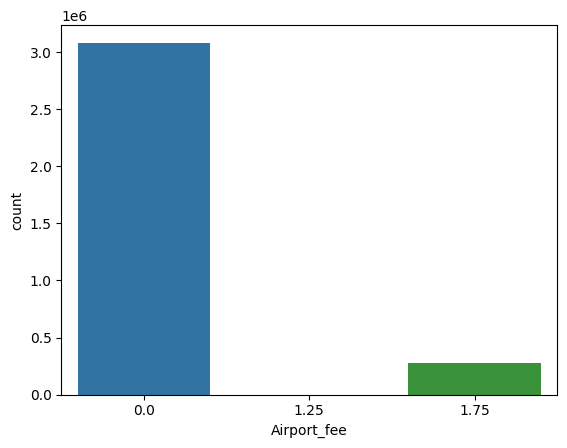

In [ ]:
sns.countplot(data=df_taxi,x='Airport_fee');


#### **Insight:**
- **Airport fee $1.25 for pick up only at LaGuardia and John F. Kennedy Airports shows only a few counts.**
- **Majority count with no airport fee.**

In [ ]:
#check the correlation between the variables
corr_matrix=df_taxi.drop(['store_and_fwd_flag'],axis=1).corr()
corr_matrix=round(corr_matrix,3)

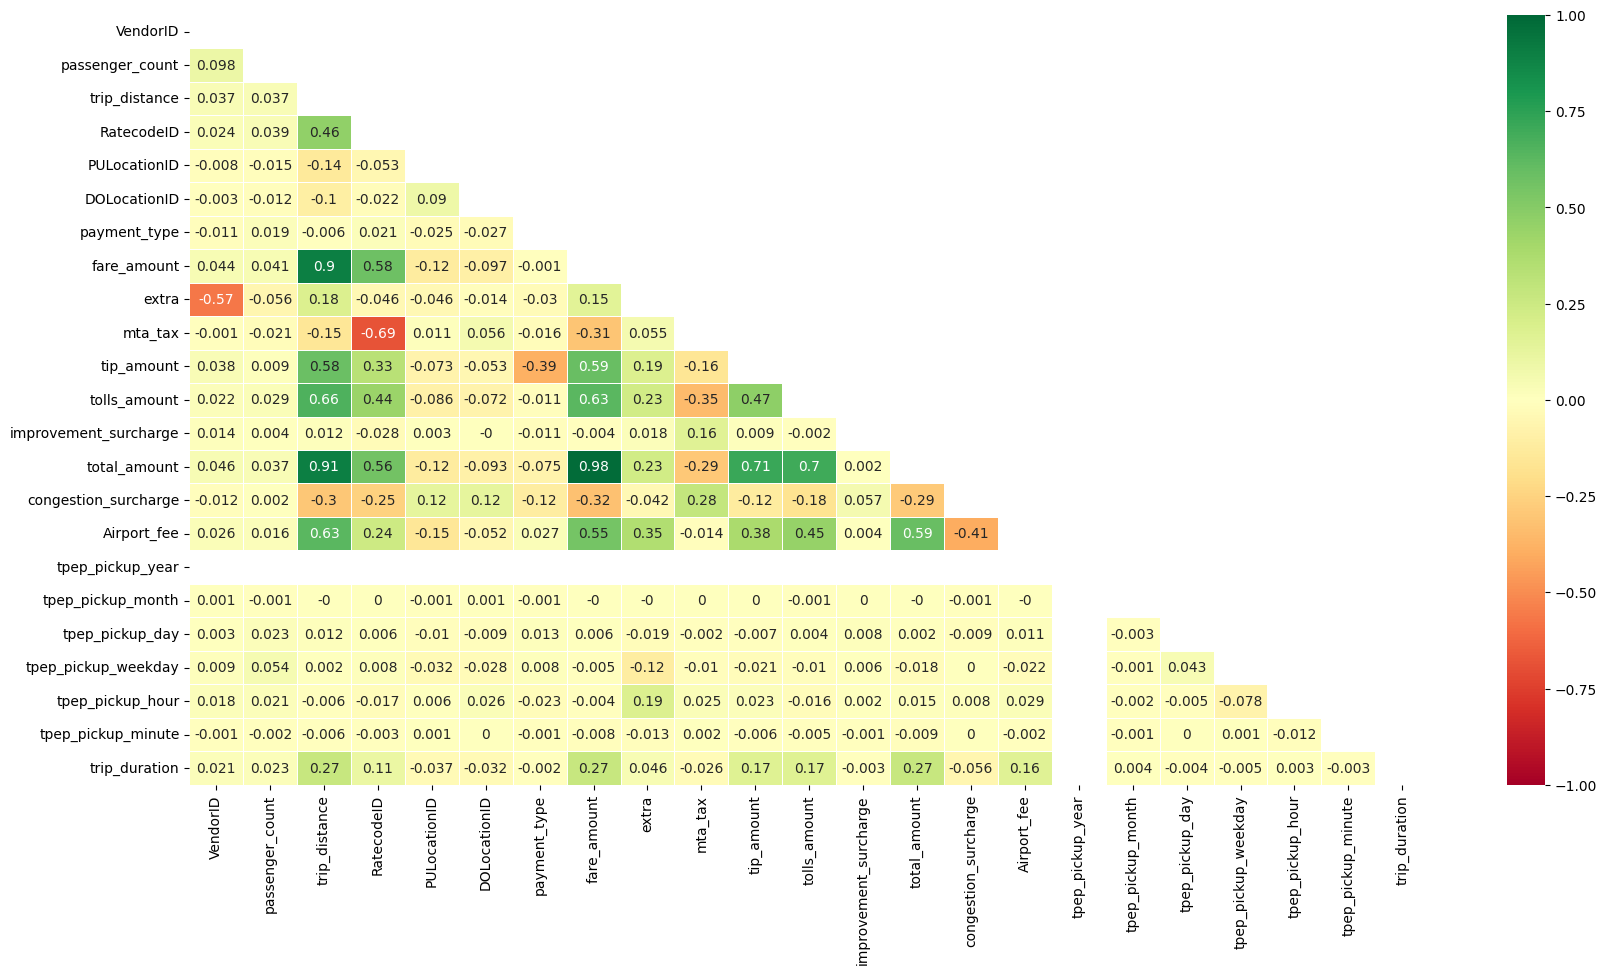

In [ ]:
plt.figure(figsize=(20,10))
mask=np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,annot=True,cmap='RdYlGn',mask=mask,linecolor='white',linewidths=0.5)
plt.show()


##### **Insight:**
- **fare_amount is highly correlated with total_amount which is obvious.**

### **6. Feature Transformation**


#### **6.1 Outlier Detection**

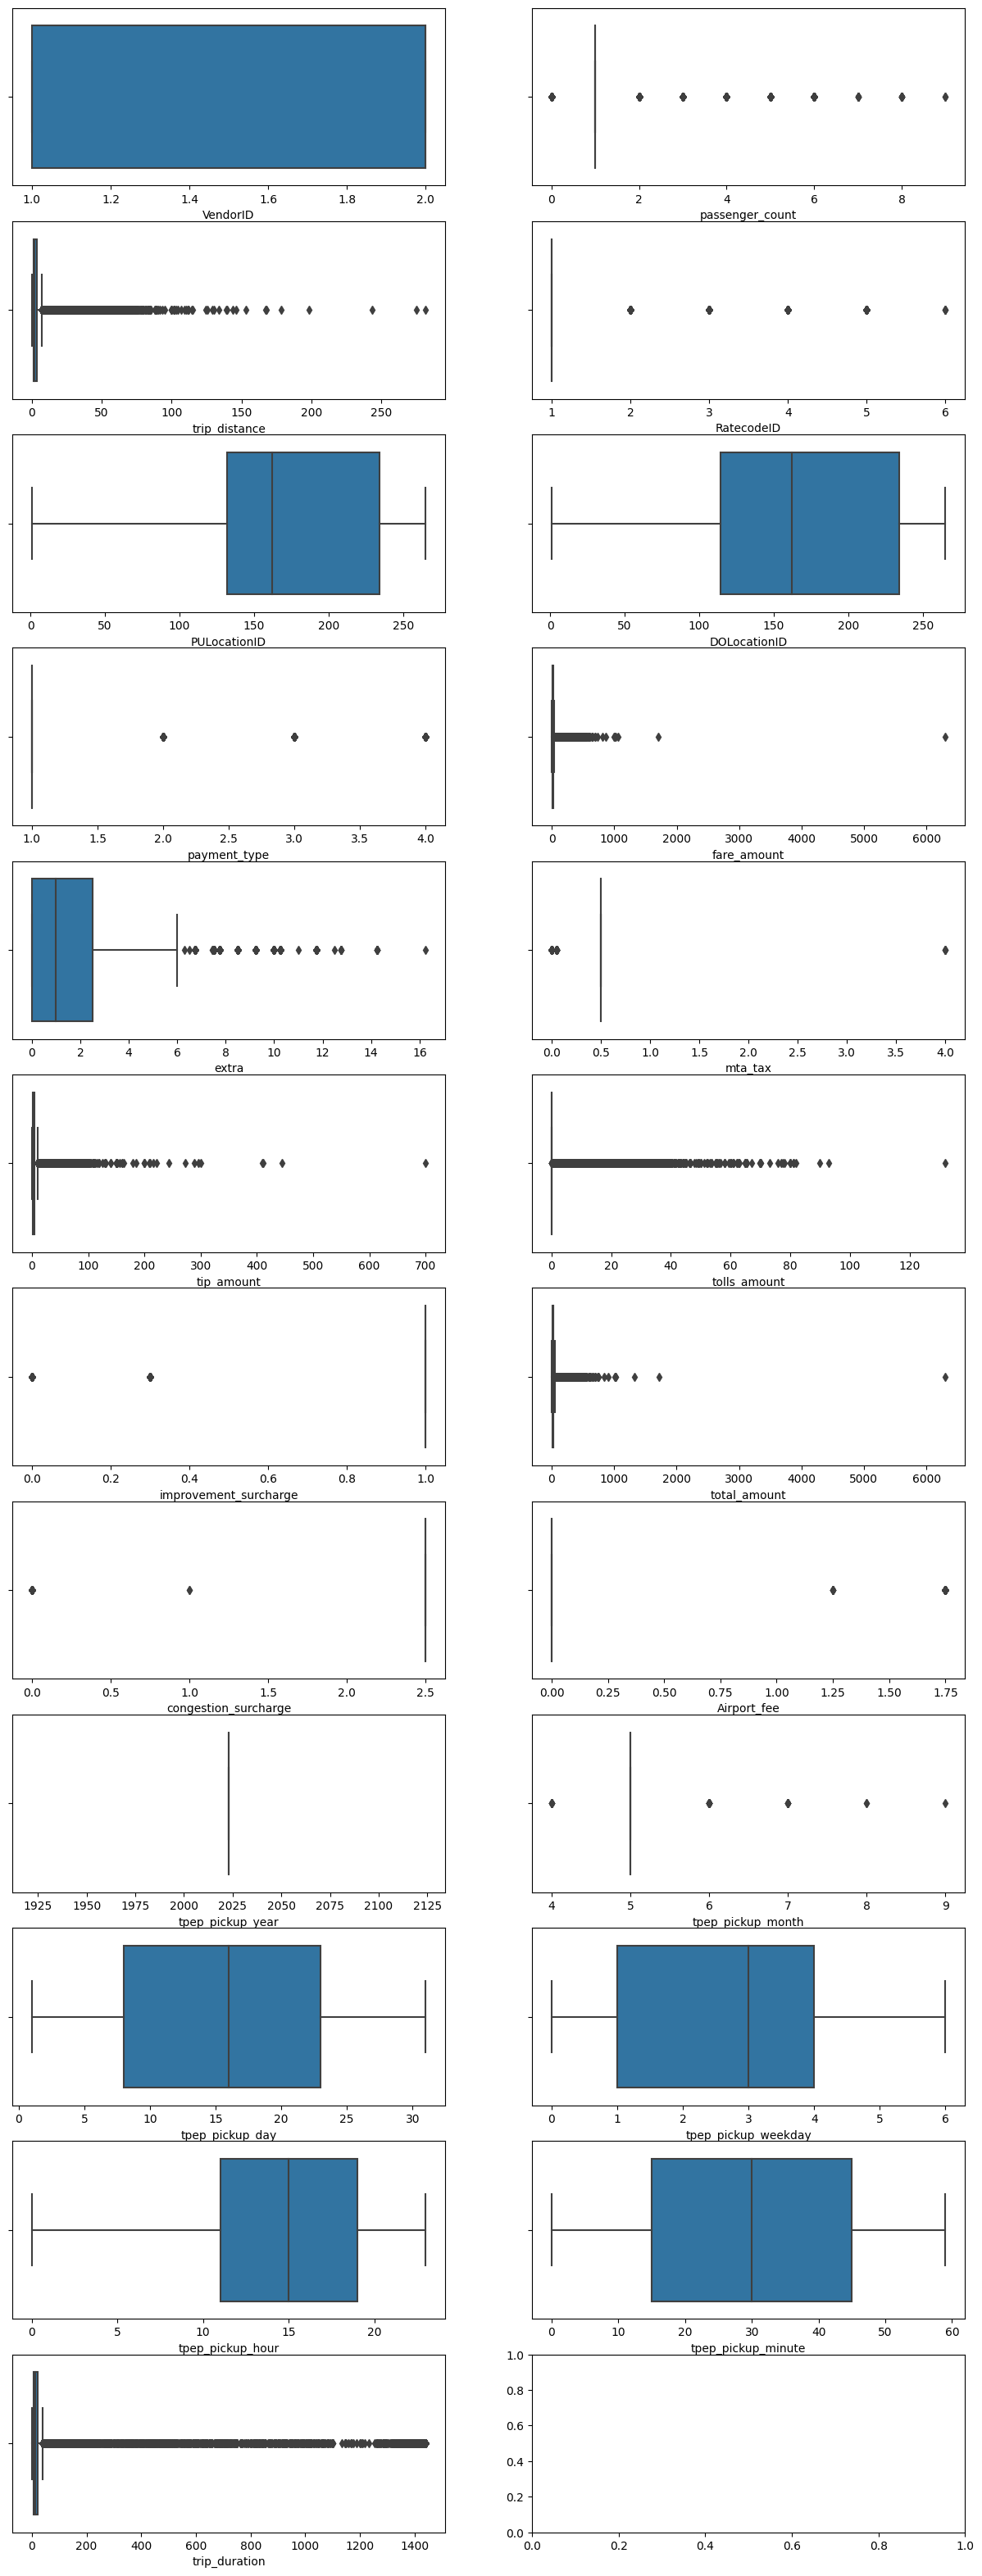

In [ ]:
fig,ax=plt.subplots(12,2,figsize=(15,40))
for column,subplot in zip(df_taxi.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime','store_and_fwd_flag'],axis=1),ax.flatten()):
    sns.boxplot(x=column,data=df_taxi,ax=subplot)

##### **Insights:**
- **Outliers can be seen in different fare related columns which can be related to some exceptional trip distance and duration.**

### **7. MODEL TRAINING**

- Prepare independent and dependent feature.
- Train test split
- Handling categorical feature
- Feature Scaling
- Model the network using artificial neural network(ANN).
- Model Evaluation and Testing

#### **7.1  Prepare independent and dependent feature.**



In [ ]:
X=df_taxi.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime','tpep_pickup_year','trip_duration'],axis=1)


In [ ]:
y=df_taxi['trip_duration']


#### **7.2  Train test split**


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)


#### **7.3  Handling categorical feature**

In [ ]:
categorical_columns=['store_and_fwd_flag']

In [ ]:
cat_pipeline=Pipeline(steps=[('one_hot_enc',OneHotEncoder(sparse_output=False,drop='first')),
                             ('scaler',StandardScaler()),
                             ('power_transformer',PowerTransformer())])

#### **7.4  Feature Scaling**


In [ ]:
numerical_columns=['VendorID','passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount', 'congestion_surcharge', 'Airport_fee', 'tpep_pickup_month', 'tpep_pickup_day',
       'tpep_pickup_weekday', 'tpep_pickup_hour', 'tpep_pickup_minute']

In [ ]:
num_pipeline=Pipeline(steps=[('scaler',StandardScaler()),('power_transformer',PowerTransformer())])


In [ ]:
preprocessor=ColumnTransformer([('num_pipeline',num_pipeline,numerical_columns),('cat_pipeline',cat_pipeline,categorical_columns)])


In [ ]:
X_train=preprocessor.fit_transform(X_train)


In [ ]:
X_test=preprocessor.transform(X_test)


#### **7.5  Model the network using artificial neural network(ANN)**

In [ ]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [ ]:
# build the model
model = build_model_using_sequential()

In [ ]:
# loss function
mse = MeanSquaredError()
model.compile(
    loss=mse,
    optimizer=Adam(learning_rate=learning_rate),
    metrics=[mse]
)

In [ ]:
checkpoint_path='/content/drive/My Drive/best_model.h5'

In [ ]:
# early stopping
es = EarlyStopping(monitor='val_mean_squared_error', mode='min',patience=6,verbose=1)
checkpt=ModelCheckpoint(checkpoint_path, monitor='val_mean_squared_error', save_best_only=True, mode='min')

In [ ]:
# train the model
history = model.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=256,
    validation_split=0.2,
    callbacks=[es,checkpt]
)

Epoch 1/40
7355/7355 [==============================] - 37s 4ms/step - loss: 1635.6385 - mean_squared_error: 1635.5983 - val_loss: 1533.6896 - val_mean_squared_error: 1533.4485
Epoch 2/40
7355/7355 [==============================] - 30s 4ms/step - loss: 1625.8103 - mean_squared_error: 1626.0005 - val_loss: 1537.5406 - val_mean_squared_error: 1537.3022
Epoch 3/40
7355/7355 [==============================] - 32s 4ms/step - loss: 1624.4202 - mean_squared_error: 1624.3813 - val_loss: 1529.6683 - val_mean_squared_error: 1529.4282
Epoch 4/40
7355/7355 [==============================] - 30s 4ms/step - loss: 1623.7872 - mean_squared_error: 1623.7471 - val_loss: 1531.4779 - val_mean_squared_error: 1531.2369
Epoch 5/40
7355/7355 [==============================] - 31s 4ms/step - loss: 1623.4128 - mean_squared_error: 1623.3729 - val_loss: 1533.7494 - val_mean_squared_error: 1533.5083
Epoch 6/40
7355/7355 [==============================] - 29s 4ms/step - loss: 1622.8541 - mean_squared_error: 1622.8

#### **7.6  Model Evaluation and Testing**


In [ ]:
y_train_pred= model.predict(X_train)

73549/73549 [==============================] - 117s 2ms/step


In [ ]:
y_test_pred= model.predict(X_test)

31521/31521 [==============================] - 50s 2ms/step


In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    return mae,rmse

In [ ]:
model_train_mae , model_train_rmse = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse= evaluate_model(y_test, y_test_pred)

In [ ]:
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))



Model performance for Training set
- Root Mean Squared Error: 40.1763
- Mean Absolute Error: 4.6393
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 40.4252
- Mean Absolute Error: 4.6546


In [ ]:
# load the saved model
saved_model = load_model('/content/drive/My Drive/best_model.h5',compile=False)

In [ ]:
y_train_pred= saved_model.predict(X_train)


73549/73549 [==============================] - 102s 1ms/step


In [ ]:
y_test_pred= saved_model.predict(X_test)


31521/31521 [==============================] - 45s 1ms/step


In [ ]:
model_train_mae , model_train_rmse = evaluate_model(y_train, y_train_pred)

model_test_mae , model_test_rmse= evaluate_model(y_test, y_test_pred)

In [ ]:
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
print('----------------------------------')

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))



Model performance for Training set
- Root Mean Squared Error: 39.9516
- Mean Absolute Error: 4.2933
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 40.1988
- Mean Absolute Error: 4.3065
